In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

#　トレーニングデータとテストデータの分割
X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3,random_state = 1,stratify = y)

In [3]:
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を使用して標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40,eta0=0.1,random_state = 1)
ppn.fit(X_train_std,y_train)

C:\Users\zundo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified sample: %d' % (y_test != y_pred).sum())

Misclassified sample: 3


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'% accuracy_score(y_test,y_pred))

Accuracy:0.93


In [8]:
print('Accuracy:%.2f' % ppn.score(X_test_std,y_test))

Accuracy:0.93


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifiter,test_idx=None,resolution=0.02):
    
    # マーカとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # 決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    # グリットポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    #　各特徴量を1次元に変換して予測を実行
    Z = classifiter.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(Z.shape)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    print(Z.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    
    # 軸の範囲の指定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    
    # クラス毎のサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],
                   alpha=0.8,
                   c = colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
        
    # テストサンプルを目立たせる
    if test_idx:
        # すべてのサンプルをプロット
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

[[-1.33269725 -1.30380366]
 [-1.16537974 -1.30380366]
 [ 0.84243039  1.44465434]
 [ 1.0655204   1.18289644]
 [-1.44424226 -1.30380366]]
[0 0 2 2 0]
(68370,)
(258, 265)


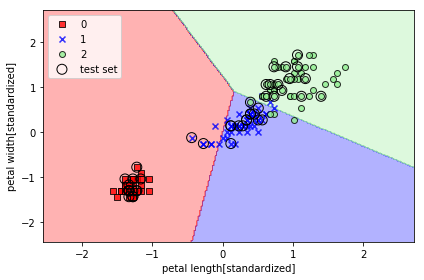

In [10]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
print(X_combined_std[0:5,:])
# トレニンーグデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))
print(y_combined[0:5])

# 決定協会のプロット
plot_decision_regions(X=X_combined_std,y=y_combined,classifiter=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

線形分離が不可能なデータセットでは、パーセプトロンアルゴリズムは決して収束しない。パーセプトロンアルゴリズムがデータ解析で推奨されないのは、そのためである。

## ロジスティック回帰

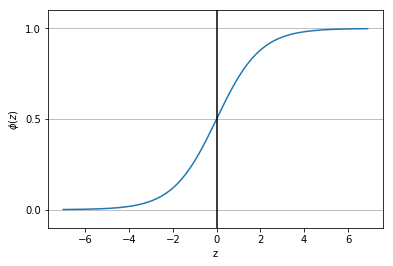

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# シグモイド関数を定義
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)

# 垂直線
plt.axvline(0.0,color='k')

plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
# y軸の目盛り
plt.yticks([0.0,0.5,1.0])

ax = plt.gca()
ax.yaxis.grid(True)

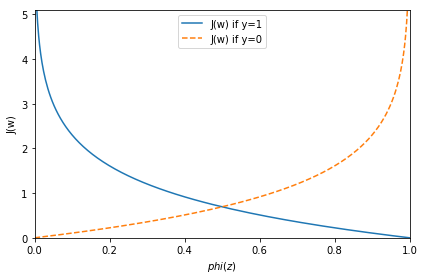

In [12]:
# y=1のコストを計算する関数
def cost_1(z):
    return -np.log(sigmoid(z))

# y=0のコストを計算する関数
def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z,c0,linestyle='--',label='J(w) if y=0')

plt.xlim(phi_z.min(),phi_z.max())
plt.ylim(0.0,5.1)

plt.xlabel('$phi(z)$')
plt.ylabel('J(w)')

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [13]:
class LogisticRegressionGd(object):
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output))-((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,z):
        return 1.0/(1.0+np.exp(-np.clip(z,-250,250)))
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)

(56425,)
(185, 305)


Text(0,0.5,'petal width[standardized]')

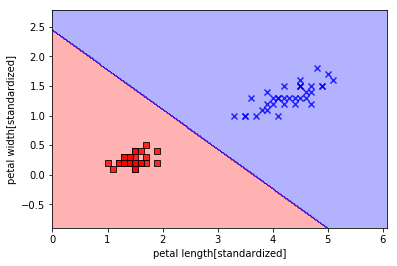

In [14]:
# クラスラベルが０と１のものだけ抽出
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGd(eta=0.05,n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifiter=lrgd)
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')

## scikit-learnを使ったロジスティック回帰モデルのトレーニング

(68370,)
(258, 265)


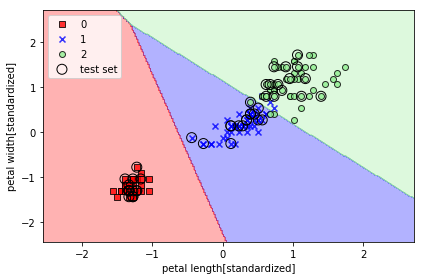

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,random_state = 1)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifiter=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [16]:
lr.predict_proba(X_test_std[:5,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13],
       [4.99230003e-05, 6.43956438e-01, 3.55993639e-01],
       [3.51636768e-04, 9.72504205e-01, 2.71441581e-02]])

In [17]:
lr.predict_proba(X_test_std[:5,:]).argmax(axis=1)

array([2, 0, 0, 1, 1], dtype=int64)

In [18]:
lr.predict(X_test_std[:5,:])

array([2, 0, 0, 1, 1])

In [19]:
# scikit-learnがデータ入力として2次元配列を期待しているため次元を1個追加する
print(X_test_std[0,:])
print(X_test_std[0,:].reshape(1,-1))
lr.predict(X_test_std[0,:].reshape(1,-1))

[0.89820289 1.44465434]
[[0.89820289 1.44465434]]


array([2])

## 正規化による過学習の対処

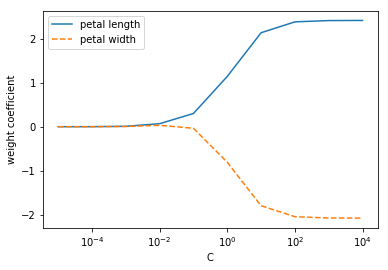

In [20]:
weights,params = [],[]
# 10個の逆正規化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,random_state=1)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

## サポートベクトルマシンによる最大のマージン分類

(68370,)
(258, 265)


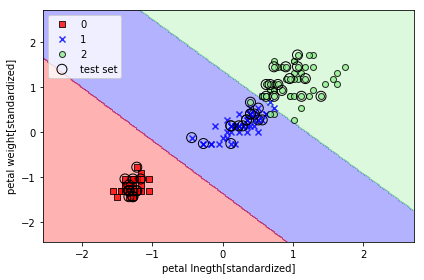

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifiter=svm,
                     test_idx=range(105,150))
plt.xlabel('petal lnegth[standardized]')
plt.ylabel('petal weight[standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import SGDClassifier
# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')
# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
# 確率的勾配降下法バージョンのSVM(損失関数=ヒンジ関数）を生成
svm = SGDClassifier(loss='hinge')

## 線形分離不可能なデータに対するカーネル手法

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]


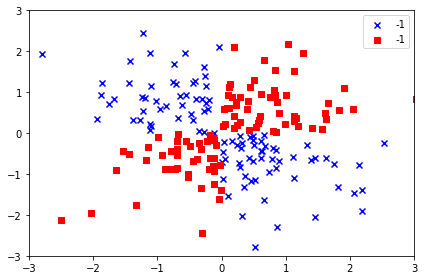

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# 乱数シードを生成
np.random.seed(1)

# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200,2)
print(X_xor[:5,:])
# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
# 排他的論理和が真の場合は1、偽の場合は-1を割り当てる
y_xor = np.where(y_xor,1,-1)

# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],
           c='b',marker='x',label='-1')
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],
           c='r',marker='s',label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(141904,)
(362, 392)


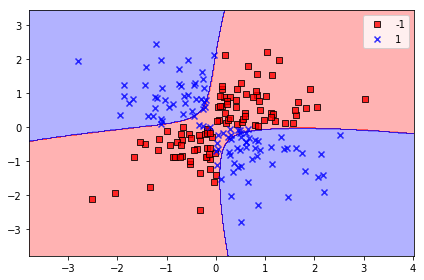

In [24]:
svm = SVC(kernel='rbf',random_state=1,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifiter=svm )
plt.legend(loc='best')
plt.tight_layout()
plt.show()

$\gamma$パラメータ(gamma=0.1)は基本的にパラメータの値を大きくすると、トレーニングサンプルの影響が大きくなる。そのため比較的$\gamma$パラメータは小さい値を選んだ方がRBFカーネルによるSVMモデルの決定境界はなめらかになる。

(141904,)
(362, 392)


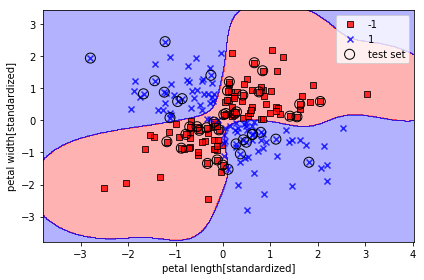

In [25]:
svm = SVC(kernel='rbf',random_state=1,gamma=1.0,C=1.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifiter=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(68370,)
(258, 265)


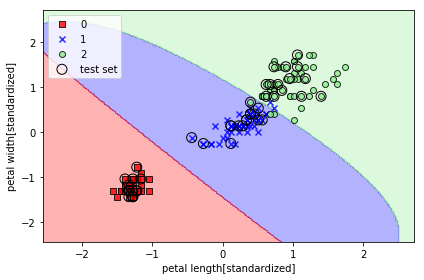

In [26]:
svm = SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifiter=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(68370,)
(258, 265)


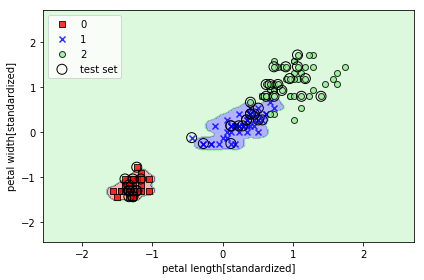

In [27]:
svm = SVC(kernel='rbf',random_state=1,gamma=100.0,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifiter=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 決定木学習

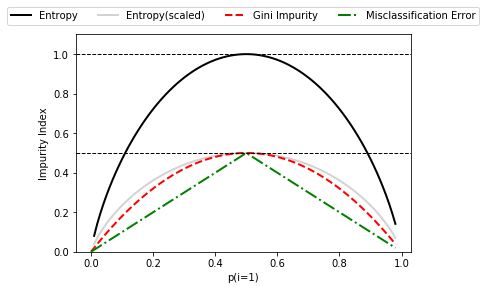

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# ジニ府純度の関数を定義
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))
# エントロピーの関数を定義
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))
# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p,1-p])

# 確率を表す配列を生成(0から0.99まで0.01刻み)
x = np.arange(0.0,0.99,0.01)
# 配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)

# エントロピー(2種)、ジニ不純度、分類誤差のそれぞれをループ
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],
                      ['Entropy','Entropy(scaled)',
                      'Gini Impurity','Misclassification Error'],
                      ['-','-','--','-.'],
                      ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
    
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
         ncol=5,fancybox=True,shadow=False)

# 2本の水平の破線を引く
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')

plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## 決定木の構築

(86900,)
(220, 395)


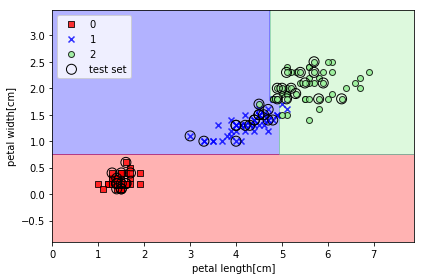

In [29]:
from sklearn.tree import DecisionTreeClassifier
# ジニ不純度を指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state =1)

tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifiter=tree,
                     test_idx = range(105,150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
from pydotplus import graph_from_dot_data
from IPython.display import Image,display
from PIL import Image
dot_data = export_graphviz(tree,
                          filled=True,
                          rounded=True,
                          class_names=['Setosa','Versicolor','Virginica'],
                          feature_names =['petal length','petal width'],
                          out_file=None)
grath = graph_from_dot_data(dot_data)
grath.write_png('tree.png')

Image('tree.png')

TypeError: 'module' object is not callable